# Credit Card Fraud Detection

# Content
##### The dataset contains transactions made by credit cards in September 2013 by European cardholders.
##### This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

##### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##### Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Description:



##### Fraud detection involves identifying and preventing deceptive activities within financial transactions or systems. Leveraging advanced analytics and machine learning techniques, fraud detection systems aim to distinguish between legitimate and fraudulent behavior. Key components include anomaly detection, pattern recognition, and real-time monitoring.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [10]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data preprocessing

In [17]:
# Handle missing values if any (in this dataset there are no missing values)
df = df.dropna()

# Feature engineering

In [20]:
# Extracting time-based features
df['Hour'] = (df['Time'] // 3600) % 24
df['Day'] = (df['Time'] // (3600 * 24)) % 7

In [22]:
# Creating amount-based features
df['LogAmount'] = np.log1p(df['Amount'])

In [24]:
# Dropping the original 'Time' and 'Amount' columns as they are replaced with new features
df = df.drop(['Time', 'Amount'], axis=1)

In [26]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate multiple machine learning models

In [33]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.999133925541004
[[85278    17]
 [   57    91]]


In [35]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.74      0.78       148

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9992977774656788
[[85274    21]
 [   39   109]]


In [36]:
# Neural Network
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\nNeural Network")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))


Neural Network
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.74      0.80       148

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9993797034280163
[[85281    14]
 [   39   109]]


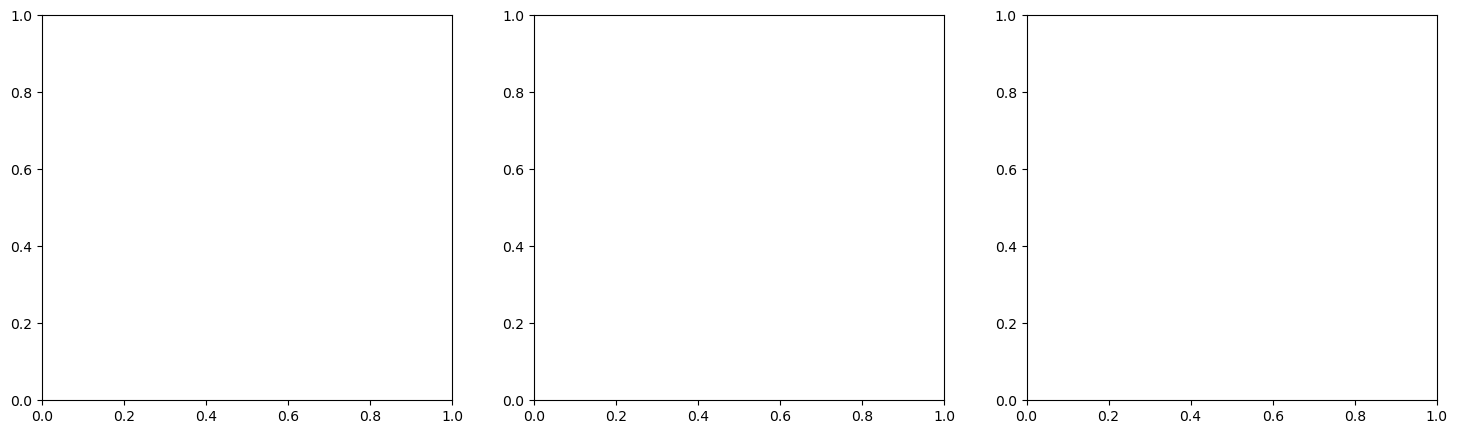

In [59]:
# Plotting confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

In [61]:
# Plot for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

Text(195.72222222222223, 0.5, 'Actual')

In [63]:
# Plot for Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Decision Tree')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

Text(688.0751633986929, 0.5, 'Actual')

In [65]:
# Plot for Neural Network
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Neural Network')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

Text(1180.4281045751634, 0.5, 'Actual')

In [67]:
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>